<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_006_%EB%8B%A4%ED%95%AD_%ED%9A%8C%EA%B7%80_(Polynomial_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%eb%8b%a4%ed%95%ad-%ed%9a%8c%ea%b7%80polynomial-regression-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with-%ed%8c%8c%ec%9d%b4%ec%8d%ac/)

사용할 모듈 포함

In [167]:
from sklearn.linear_model import LinearRegression #선형 회귀
from sklearn.preprocessing import PolynomialFeatures #다항 특성

from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.metrics import r2_score #r2 결정 계수(회귀)
from sklearn.model_selection import cross_val_score #교차 검증 점수

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 다항 회귀

선형 모델은 학습을 통해 선형 회귀 함수를 도출

독립 변수와 종속 변수의 관계를 선형 관계보다 다항 관계로 나타낼 때 더 좋은 결과를 낼 수 있다.

이 때 독립 변수의 특성을 다항 특성으로 변환하면 선형 모델로도 다항 관계를 도출할 수 있다.

In [173]:
data = [[1,2],[3,4]]
pf = PolynomialFeatures(degree=2)
data_p2 = pf.fit_transform(data)
print(data_p2)

[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]


In [174]:
pf = PolynomialFeatures(degree=2,include_bias=False)
data_p2 = pf.fit_transform(data)
print(data_p2)

[[ 1.  2.  1.  2.  4.]
 [ 3.  4.  9. 12. 16.]]


- 실험에 사용할 데이터

In [175]:
heights = np.array([8,20,28,42,53,63,73,78,90,102,108,122,128,138,153,162,167,173,176,177,181])
volumns = np.array([1,2,5,9,15,19,27,32,39,55,60,77,89,108,123,138,153,170,190,218,230])

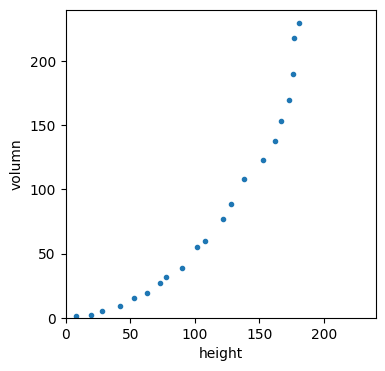

In [176]:
plt.figure(figsize=(4,4))
plt.plot(heights,volumns,'.')
plt.xlim(0,240)
plt.ylim(0,240)
plt.xlabel('height')
plt.ylabel('volumn')
plt.show()

- 원래 값 그대로 선형 모델로 학습

In [177]:
x = heights.reshape(-1,1)
y = volumns

In [180]:
model = LinearRegression()
model.fit(x,y)
boudary = [[0],[240]]
pred = model.predict(boudary)
print(f'{boudary} : {pred}')
print(f'y = {model.coef_[0]:.2f}*x{model.intercept_:+.2f}')


[[0], [240]] : [-48.21291782 248.57258879]
y = 1.24*x-48.21


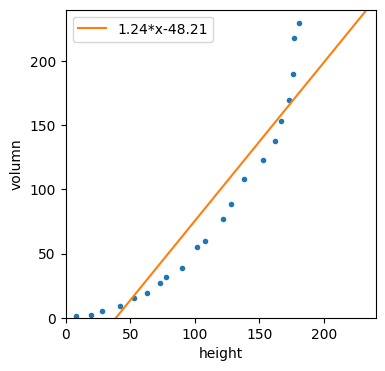

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(heights,volumns,'.')
plt.plot([0,240],pred,label=f'{model.coef_[0]:.2f}*x{model.intercept_:+.2f}')
plt.xlim(0,240)
plt.ylim(0,240)
plt.xlabel('height')
plt.ylabel('volumn')
plt.legend()
plt.show()

In [182]:
pf = PolynomialFeatures(degree=2,include_bias=False)
pf_x = pf.fit_transform(x)
print(f'원본 구조:{x.shape} 변환 후 구조:{pf_x.shape}')

원본 구조:(21, 1) 변환 후 구조:(21, 2)


In [ ]:
print(x[0], pf_x[0])

[8] [ 8. 64.]


In [ ]:
model = LinearRegression()
model.fit(pf_x,y)
w1 = model.coef_[0]
w2 = model.coef_[1]
b = model.intercept_
print(f"회귀식: y = {w2:.2f}*x^2 {w1:+.2f}*x {b:+.2f} ")

회귀식: y = 0.01*x^2 -0.47*x +11.50 


In [ ]:
sx = np.array(range(0,240,5)).reshape(-1,1)
pf_sx = pf.fit_transform(sx)
pred = model.predict(pf_sx)

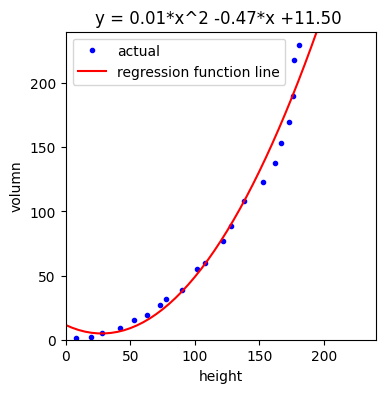

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(heights,volumns,'b.',label='actual')
plt.plot(sx,pred,'r',label='regression function line')
plt.xlim(0,240)
plt.ylim(0,240)
plt.xlabel('height')
plt.ylabel('volumn')
plt.legend()
plt.title(f"y = {w2:.2f}*x^2 {w1:+.2f}*x {b:+.2f} ")
plt.show()

In [183]:
pf = PolynomialFeatures(degree=10,include_bias=False)
pf_x10 = pf.fit_transform(x)
print(pf_x10.shape)

(21, 10)


In [185]:
model = LinearRegression()
model.fit(pf_x10,y)
pred = model.predict(pf_x10)

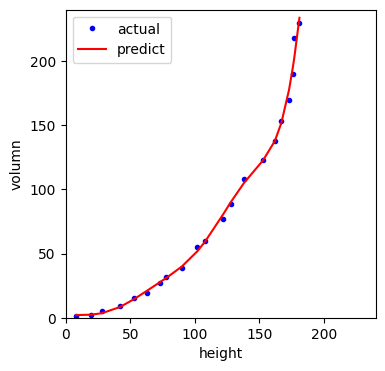

In [186]:
plt.figure(figsize=(4,4))
plt.plot(heights,volumns,'b.',label='actual')
plt.plot(heights,pred,'r',label='predict')
plt.xlim(0,240)
plt.ylim(0,240)
plt.xlabel('height')
plt.ylabel('volumn')
plt.legend()
plt.show()

##학생 건강 데이터

공공데이터 포털 2015년 학생 신체 검사 데이터

In [197]:
df = pd.read_csv('https://raw.githubusercontent.com/ehpub/ML-with-Python/main/stu_health_2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  9686 non-null   float64
 1   weight  9682 non-null   float64
dtypes: float64(2)
memory usage: 151.5 KB


In [198]:
df = df.dropna(axis=0)
data = df[['height']]
target = df['weight']
x_train, x_test, y_train, y_test = train_test_split(data,target)
x_train2,x_val, y_train2,y_val = train_test_split(x_train,y_train)
print(y_train2.shape, y_val.shape, y_test.shape)

(5445,) (1816,) (2421,)


In [199]:
print("다항 회귀 적용 X 모델 학습 및 검증")
model = LinearRegression()
model.fit(x_train2,y_train2)
pred_val = model.predict(x_val)
print(f"R2 결정 계수:{r2_score(y_val,pred_val):.4f}")

다항 회귀 적용 X 모델 학습 및 검증
R2 결정 계수:0.7238


In [200]:
print("다항 회귀 적용 O 모델 학습 및 검증")
for d in range(2,5):
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train2)
  x_train_p =pf.transform(x_train2)
  model = LinearRegression()
  print("###degree",d)
  model.fit(x_train_p,y_train2)
  x_val_p = pf.transform(x_val)
  pred_val = model.predict(x_val_p)
  print(f"R2 결정 계수:{r2_score(y_val,pred_val):.4f}")

다항 회귀 적용 O 모델 학습 및 검증
###degree 2
R2 결정 계수:0.7288
###degree 3
R2 결정 계수:0.7293
###degree 4
R2 결정 계수:0.7293


In [201]:
print("모델 평가")
pf = PolynomialFeatures(degree=3,include_bias=False)
pf.fit(x_train)
x_train_p =pf.transform(x_train)
x_test_p = pf.transform(x_test)

model = LinearRegression()
print("###degree",3)
model.fit(x_train_p,y_train)

pred_test = model.predict(x_test_p)
print(f"R2 결정 계수:{r2_score(y_test,pred_test):.4f}")

모델 평가
###degree 3
R2 결정 계수:0.7311


In [202]:
print("다항 회귀 적용 X 모델 학습 및 검증")
model = LinearRegression()
scores = cross_val_score(model,x_train,y_train)
print(f"교차 검증 점수(평균):{scores.mean():.4f}")
model.fit(x_train,y_train)
pred_test = model.predict(x_test)
print(f"R2 결정 계수:{r2_score(y_test,pred_test):.4f}")

다항 회귀 적용 X 모델 학습 및 검증
교차 검증 점수(평균):0.7185
R2 결정 계수:0.7259


In [203]:
print("다항 회귀 적용 O 모델 학습 및 검증")
for d in range(2,5):
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train)
  x_train_p =pf.transform(x_train)
  x_test_p =pf.transform(x_test)
  model = LinearRegression()
  print("###degree",d)
  scores = cross_val_score(model,x_train_p,y_train)
  print(f"교차 검증 점수(평균):{scores.mean():.4f}")
  model.fit(x_train_p,y_train)
  pred_test = model.predict(x_test_p)
  print(f"R2 결정 계수:{r2_score(y_test,pred_test):.4f}")

다항 회귀 적용 O 모델 학습 및 검증
###degree 2
교차 검증 점수(평균):0.7218
R2 결정 계수:0.7301
###degree 3
교차 검증 점수(평균):0.7223
R2 결정 계수:0.7311
###degree 4
교차 검증 점수(평균):0.7222
R2 결정 계수:0.7310


###degree 1


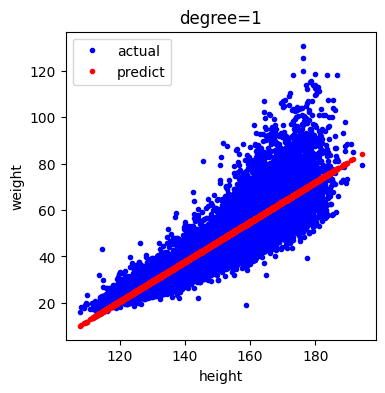

In [205]:
model = LinearRegression()
print("###degree",1)
model.fit(data,target)
pred_val = model.predict(data)
plt.figure(figsize=(4,4))
plt.plot(data,target,'b.',label='actual')
plt.plot(data,pred_val,'r.',label='predict')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.title('degree=1')
plt.show()

###degree 2


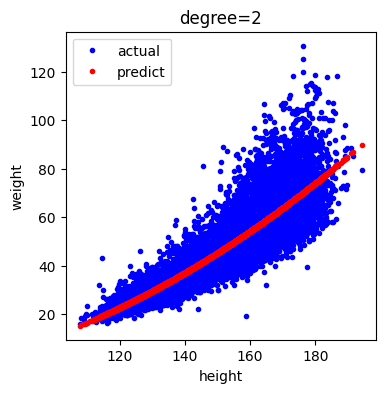

###degree 3


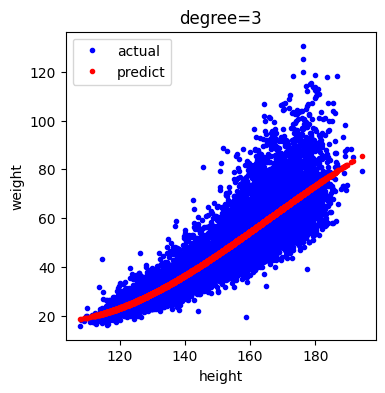

###degree 4


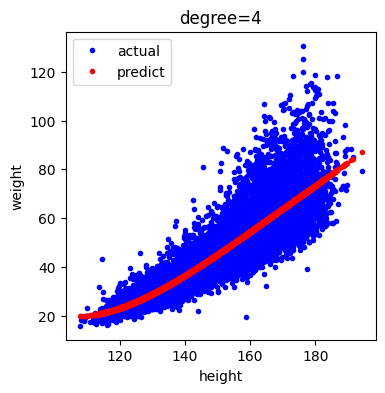

In [204]:
for d in range(2,5):
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(data)
  data_p =pf.transform(data)
  model = LinearRegression()
  print("###degree",d)
  model.fit(data_p,target)
  pred_val = model.predict(data_p)
  plt.figure(figsize=(4,4))
  plt.plot(data,target,'b.',label='actual')
  plt.plot(data,pred_val,'r.',label='predict')
  plt.xlabel('height')
  plt.ylabel('weight')
  plt.legend()
  plt.title(f'degree={d}')
  plt.show()

## 지하철 대기 데이터

In [212]:
path = 'https://raw.githubusercontent.com/ehpub/ML-with-Python/main/subway_air_2022.csv'
df = pd.read_csv(path,encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연번       263 non-null    int64  
 1   호선       263 non-null    object 
 2   역명       263 non-null    object 
 3   미세먼지     263 non-null    float64
 4   초미세먼지    263 non-null    float64
 5   이산화탄소    263 non-null    int64  
 6   폼알데하이드   263 non-null    float64
 7   일산화탄소    263 non-null    float64
 8   데이터기준일자  263 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 18.6+ KB


In [217]:
data = df[['미세먼지','일산화탄소','폼알데하이드','이산화탄소']].values[:50]
target = df['초미세먼지'][:50].values
x_train, x_test, y_train, y_test = train_test_split(data,target)
x_train2,x_val, y_train2,y_val = train_test_split(x_train,y_train)
print(y_train2.shape, y_val.shape, y_test.shape)

(27,) (10,) (13,)


In [218]:
print("다항 회귀 적용 X 모델 학습 및 검증")
model = LinearRegression()
model.fit(x_train2,y_train2)
pred_val = model.predict(x_val)
print(f"R2 결정 계수:{r2_score(y_val,pred_val):.4f}")

다항 회귀 적용 X 모델 학습 및 검증
R2 결정 계수:0.8632


In [219]:
print("다항 회귀 적용 O 모델 학습 및 검증")
for d in range(2,5):
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train2)
  x_train_p =pf.transform(x_train2)
  model = LinearRegression()
  print("###degree",d)
  model.fit(x_train_p,y_train2)
  x_val_p = pf.transform(x_val)
  pred_val = model.predict(x_val_p)
  print(f"R2 결정 계수:{r2_score(y_val,pred_val):.4f}")

다항 회귀 적용 O 모델 학습 및 검증
###degree 2
R2 결정 계수:0.6458
###degree 3
R2 결정 계수:-24.9708
###degree 4
R2 결정 계수:-36061.0465


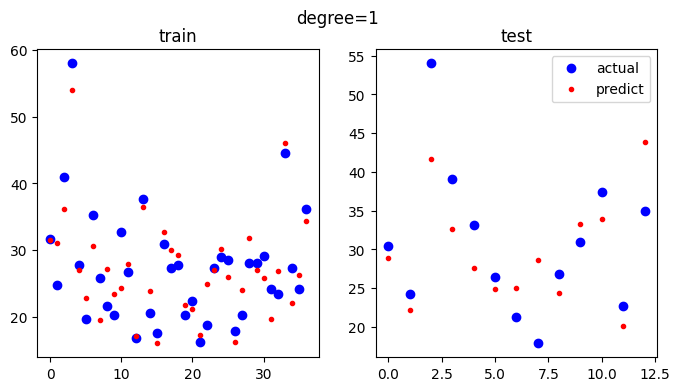

최대 오차: 12.326388594083994


In [221]:
model = LinearRegression()
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

fig,axs = plt.subplots(ncols=2,figsize=(8,4))
axs[0].plot(y_train,'bo',label='actual')
axs[0].plot(pred_train,'r.',label='predict')
axs[0].set_title('train')
axs[1].plot(y_test,'bo',label='actual')
axs[1].plot(pred_test,'r.',label='predict')
axs[1].set_title('test')
plt.suptitle(f'degree=1')
plt.legend()
plt.show()
diff = pred_test - y_test
print("최대 오차:",np.abs(diff).max())

###degree 2


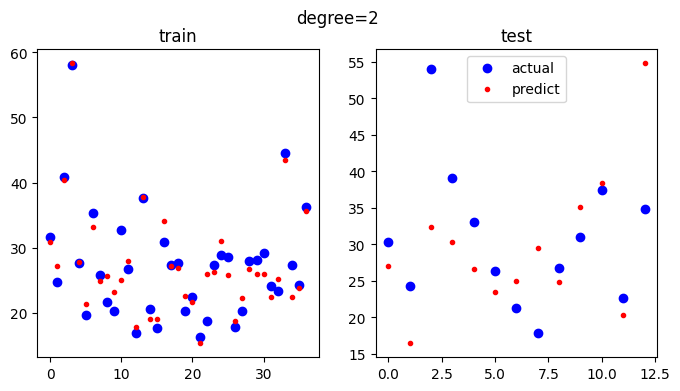

최대 오차: 21.63646810856676
###degree 3


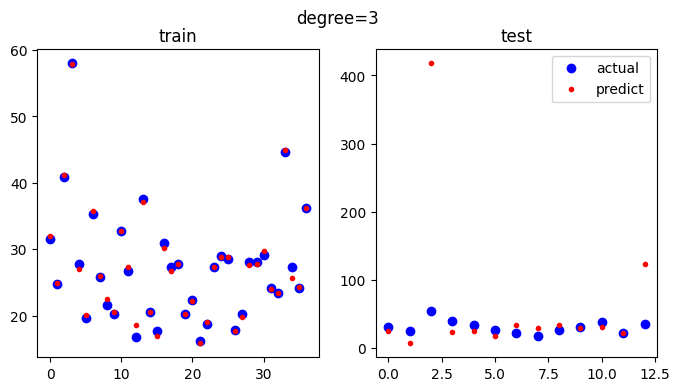

최대 오차: 363.774002753632
###degree 4


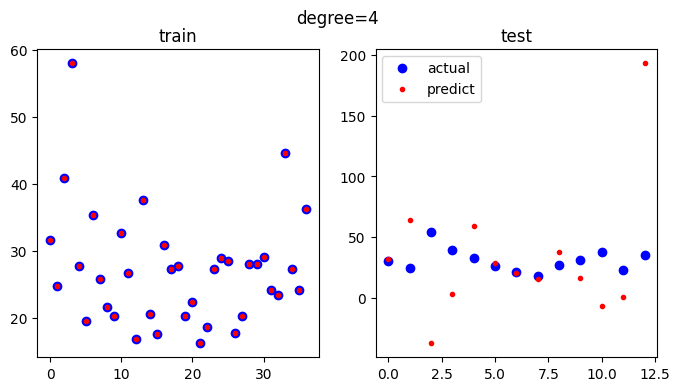

최대 오차: 158.19396346647622


In [222]:
for d in range(2,5):
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train)
  x_train_p =pf.transform(x_train)
  x_test_p =pf.transform(x_test)

  model = LinearRegression()
  print("###degree",d)
  model.fit(x_train_p,y_train)
  pred_train = model.predict(x_train_p)
  pred_test = model.predict(x_test_p)

  fig,axs = plt.subplots(ncols=2,figsize=(8,4))
  axs[0].plot(y_train,'bo',label='actual')
  axs[0].plot(pred_train,'r.',label='predict')
  axs[0].set_title('train')

  axs[1].plot(y_test,'bo',label='actual')
  axs[1].plot(pred_test,'r.',label='predict')
  axs[1].set_title('test')

  plt.suptitle(f'degree={d}')
  plt.legend()
  plt.show()
  diff = pred_test - y_test
  print("최대 오차:",np.abs(diff).max())